The Functional API
===============

https://keras.io/guides/functional_api/

In [1]:
#Setup

try:
    import tensorflow as tf
    from tensorflow import keras
    #from keras.models import Sequential
    from keras import layers
except ImportError as e:
    print(f"Error occurred while importing modules: {e}")

In [3]:
# Start by creating an input node:

try:
    inputs = layers.Input(shape=(784,))
    print("keras.layers.Input is available for use.")
    print(f"Shape of 'inputs': {inputs.shape}")
    print(f"Data type of 'inputs': {inputs.dtype}")
except (NameError, AttributeError):
    print("keras.layers.Input is not available.")

keras.layers.Input is available for use.
Shape of 'inputs': (None, 784)
Data type of 'inputs': <dtype: 'float32'>


In [4]:
# You create a new node in the graph of layers by calling a layer on this inputs object:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [14]:
# To add more layers to the graph of layers:
x = layers.Dense(64, activation='relu')(x)

In [15]:
# Define the output layer
outputs = layers.Dense(10)(x)

In [16]:
# Create the output model
model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")

In [17]:
# Show a summary
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 63,370
Trainable params: 63,370
Non-traina

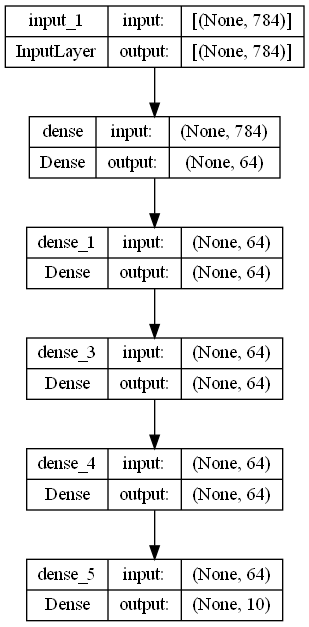

In [18]:
# Display a graphic model

import pydot
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

#API overview: a first end-to-end example
===============
When passing data to the built-in training loops of a model, you should either use NumPy arrays (if your data is small and fits in memory) or tf.data.Dataset objects. In the next few paragraphs, we'll use the MNIST dataset as NumPy arrays, in order to demonstrate how to use optimizers, losses, and metrics.

Let's consider the following model (here, we build in with the Functional API, but it could be a Sequential model or a subclassed model as well):

In [19]:
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 63,370
Trainable params: 63,370
Non-traina

Here's what the typical end-to-end workflow looks like, consisting of:

1. Training
2. Validation on a holdout set generated from the original training data
3. Evaluation on the test data

We'll use MNIST data for this example.

https://keras.io/guides/training_with_built_in_methods/

In [20]:
'''
This code loads the MNIST dataset using the load_data() function from keras.datasets.mnist. 
It returns four NumPy arrays: x_train, y_train, x_test, and y_test. 
x_train and x_test contain the images (pixel data) of handwritten digits, 
while y_train and y_test contain the corresponding labels (digits from 0 to 9).
'''

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
'''
The images in x_train are reshaped from 28x28 matrices to a flat array of 784 elements. 
Each image is transformed into a 1D array of pixel values. 
The astype("float32") converts the pixel values to 32-bit floating-point numbers, 
and then the pixel values are normalized by dividing them by 255. 
Normalizing the pixel values to the range [0, 1] helps in faster convergence of the neural network during training.
The same preprocessing is applied to the test set, x_test, to reshape and normalize the pixel values.
The labels y_train and y_test are converted to 32-bit floating-point numbers.
This conversion is done to ensure consistency in data types during training and evaluation.
'''

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [ ]:
# Reserve 10,000 samples for validation

'''
The last 10,000 samples from the training set are separated to create a validation set. This validation set will be used during training to monitor the model's performance and prevent overfitting.
'''
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

In [ ]:
encoder.dtype